# Banknote Dataset

The Banknote Dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. 

There are 1,372 observations with 4 input variables and 1 output variable. The variable names are as follows:

Variance of Wavelet Transformed image (continuous).

Skewness of Wavelet Transformed image (continuous).

Kurtosis of Wavelet Transformed image (continuous).

Entropy of image (continuous).

Class (0 for authentic, 1 for inauthentic).

The baseline performance of predicting the most prevalent class is a classification accuracy of approximately 50%.

In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib.colors import ListedColormap



In [2]:
# Define the column names
column_names = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']

# Read the text file directly into a DataFrame using pandas
df = pd.read_csv('/Users/elahehbeheshti/Desktop/Fall2024/Machine Learning/Algorithm/Perceptron-Adeline/data_banknote_authentication.txt', delimiter=",", names=column_names)  # Modify delimiter as per the file structure
print("First few rows of the dataset:")
print(df.head())  # Display the first few rows


First few rows of the dataset:
   Variance  Skewness  Kurtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


the columns are:

Variance
Skewness
Kurtosis
Entropy
Class (0 for authentic, 1 for inauthentic)

We will:

Select samples from the two classes (0 and 1).

Use two of the four features (e.g., Variance and Skewness) to create a scatter plot.

Plot the points with different colors and markers to distinguish between authentic and inauthentic banknotes.

Adjust the labels and axis names to reflect the new variables.

In [8]:

class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [9]:
df.tail()

,Variance,Skewness,Kurtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [20]:

# select Variance and Skewness
y = df.iloc[0:100, 4].values
y = np.where(y == 0, -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

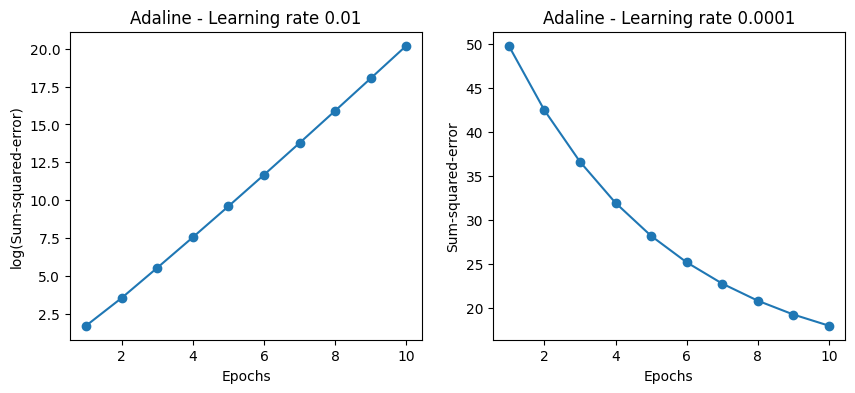

In [21]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

In [22]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [23]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

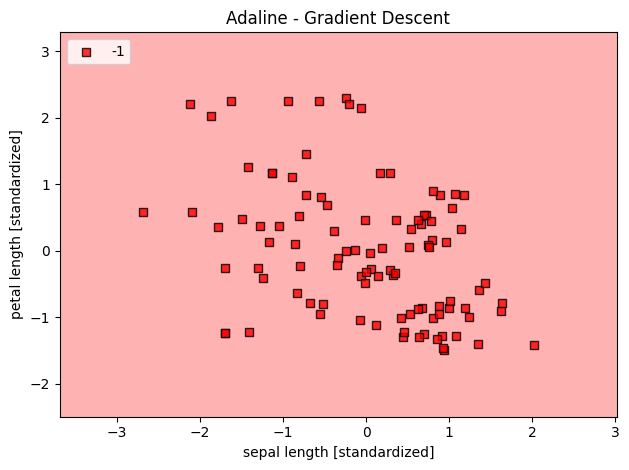

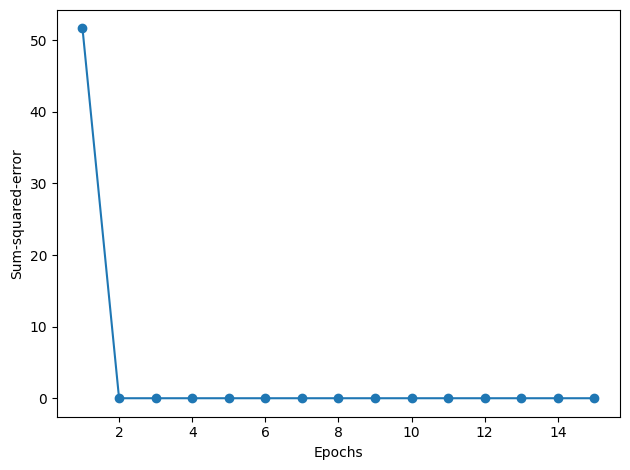

In [24]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

In [25]:
### stochastic gradient descent
class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training samples in each epoch.

        
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

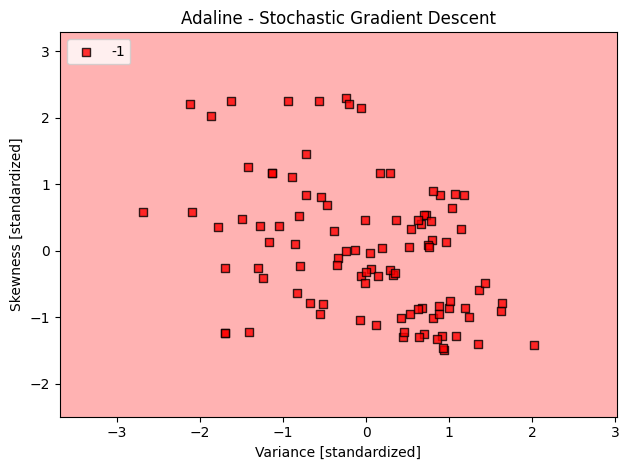

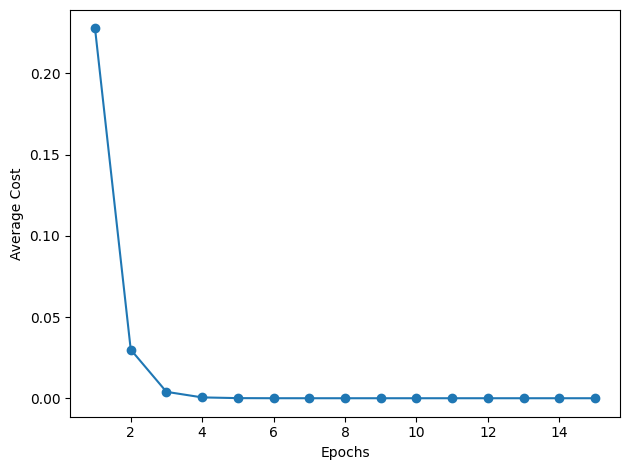

In [26]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('Variance [standardized]')
plt.ylabel('Skewness [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()

# Comparison of perceptron and adeline

Perceptron Accuracy: 0.9903
Perceptron Confusion Matrix:
[[226   3]
 [  1 182]]
Perceptron Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412

AdalineGD Accuracy: 0.5971
AdalineGD Confusion Matrix:
[[137  92]
 [ 74 109]]
AdalineGD Classification Report:
              precision    recall  f1-score   support

          -1       0.65      0.60      0.62       229
           1       0.54      0.60      0.57       183

    accuracy                           0.60       412
   macro avg       0.60      0.60      0.60       412
weighted avg       0.60      0.60      0.60       412

AdalineSGD Accuracy: 0.9757
AdalineSGD Confusion Matrix:
[[219  10]
 [  0 183]]
AdalineSGD Classification Report:
       

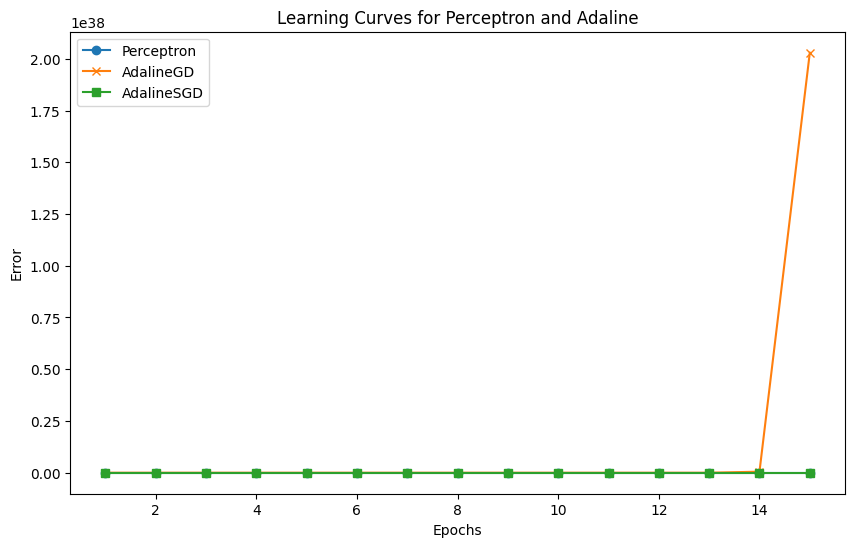

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Convert class labels: 0 -> -1 and 1 -> 1 (for compatibility)
y = np.where(df['Class'].values == 0, -1, 1)

# Select all four features for training
X = df[['Variance', 'Skewness', 'Kurtosis', 'Entropy']].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
X_train_std = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_test_std = (X_test - X_test.mean(axis=0)) / X_test.std(axis=0)

# Define the Perceptron class (same as before)
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Train the Perceptron on the standardized dataset
ppn = Perceptron(eta=0.01, n_iter=15)
ppn.fit(X_train_std, y_train)

# Make predictions and evaluate accuracy for Perceptron
y_pred_perceptron = ppn.predict(X_test_std)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print(f'Perceptron Accuracy: {accuracy_perceptron:.4f}')
print('Perceptron Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_perceptron))
print('Perceptron Classification Report:')
print(classification_report(y_test, y_pred_perceptron))

# Train the AdalineGD on the standardized dataset
adaline_gd = AdalineGD(eta=0.01, n_iter=15)
adaline_gd.fit(X_train_std, y_train)

# Make predictions and evaluate accuracy for AdalineGD
y_pred_adaline_gd = adaline_gd.predict(X_test_std)
accuracy_adaline_gd = accuracy_score(y_test, y_pred_adaline_gd)
print(f'AdalineGD Accuracy: {accuracy_adaline_gd:.4f}')
print('AdalineGD Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_adaline_gd))
print('AdalineGD Classification Report:')
print(classification_report(y_test, y_pred_adaline_gd))

# Train the AdalineSGD on the standardized dataset
adaline_sgd = AdalineSGD(eta=0.01, n_iter=15, random_state=1)
adaline_sgd.fit(X_train_std, y_train)

# Make predictions and evaluate accuracy for AdalineSGD
y_pred_adaline_sgd = adaline_sgd.predict(X_test_std)
accuracy_adaline_sgd = accuracy_score(y_test, y_pred_adaline_sgd)
print(f'AdalineSGD Accuracy: {accuracy_adaline_sgd:.4f}')
print('AdalineSGD Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_adaline_sgd))
print('AdalineSGD Classification Report:')
print(classification_report(y_test, y_pred_adaline_sgd))

# Plot learning curves (cost vs. epochs) for each model
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o', label='Perceptron')
plt.plot(range(1, len(adaline_gd.cost_) + 1), adaline_gd.cost_, marker='x', label='AdalineGD')
plt.plot(range(1, len(adaline_sgd.cost_) + 1), adaline_sgd.cost_, marker='s', label='AdalineSGD')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Learning Curves for Perceptron and Adaline')
plt.legend()
plt.show()


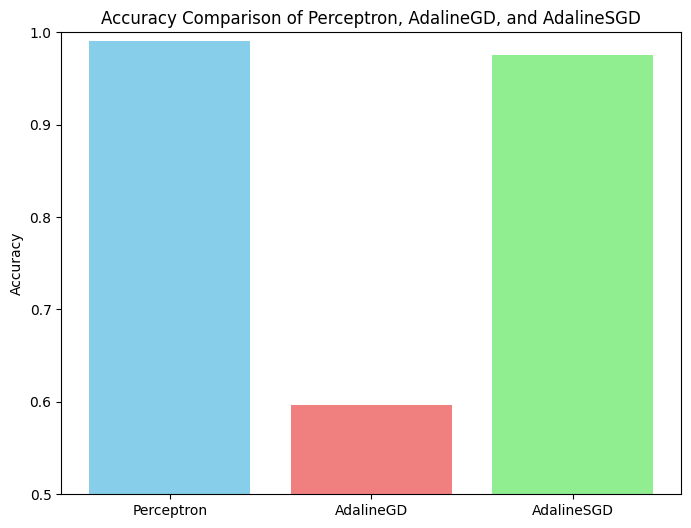

In [30]:
# Accuracy comparison
models = ['Perceptron', 'AdalineGD', 'AdalineSGD']
accuracies = [accuracy_perceptron, accuracy_adaline_gd, accuracy_adaline_sgd]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Perceptron, AdalineGD, and AdalineSGD')
plt.ylim([0.5, 1.0])
plt.show()


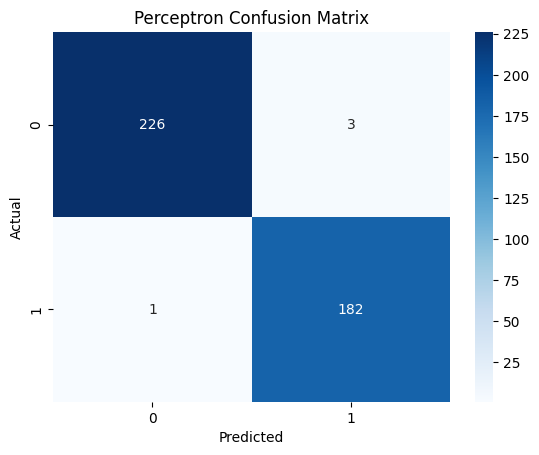

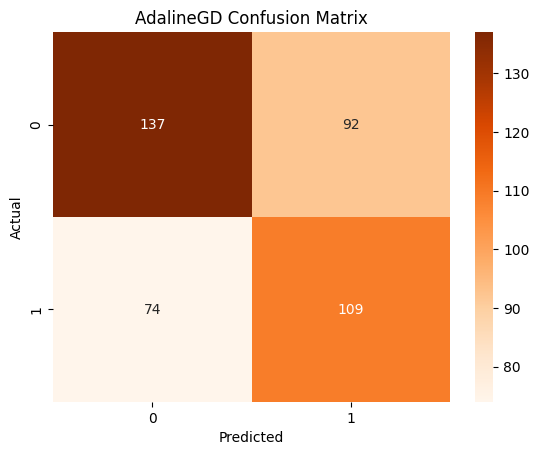

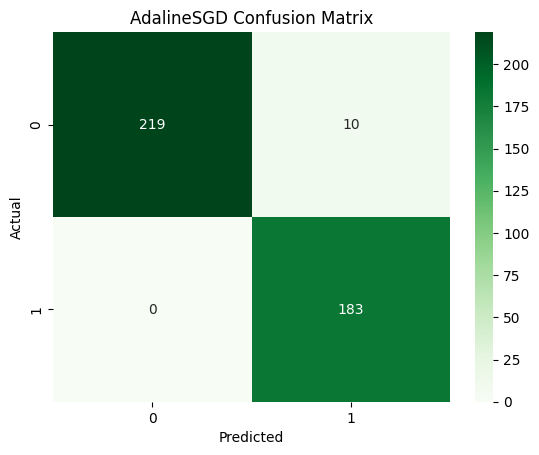

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for Perceptron
cm_perceptron = confusion_matrix(y_test, y_pred_perceptron)
sns.heatmap(cm_perceptron, annot=True, fmt='d', cmap='Blues')
plt.title('Perceptron Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix for AdalineGD
cm_adaline_gd = confusion_matrix(y_test, y_pred_adaline_gd)
sns.heatmap(cm_adaline_gd, annot=True, fmt='d', cmap='Oranges')
plt.title('AdalineGD Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix for AdalineSGD
cm_adaline_sgd = confusion_matrix(y_test, y_pred_adaline_sgd)
sns.heatmap(cm_adaline_sgd, annot=True, fmt='d', cmap='Greens')
plt.title('AdalineSGD Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
